In [ ]:
import numpy as np
import pandas as pd


In [ ]:
filepath = r"/content/Restaurants_Train_v2.csv"

In [ ]:
data = pd.read_csv(filepath)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.iloc[:10]

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,negative,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,positive,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,positive,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,neutral,141,145
5,2846,"Not only was the food outstanding, but the lit...",food,positive,17,21
6,2846,"Not only was the food outstanding, but the lit...",perks,positive,51,56
7,1458,Our agreed favorite is the orrechiete with sau...,orrechiete with sausage and chicken,positive,27,62
8,1458,Our agreed favorite is the orrechiete with sau...,waiters,positive,76,83
9,1458,Our agreed favorite is the orrechiete with sau...,meats,neutral,152,157


In [ ]:
df.isna().sum()

id             0
Sentence       0
Aspect Term    0
polarity       0
from           0
to             0
dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [ ]:
translator = str.maketrans("", "", string.punctuation)

In [ ]:
df['Sentence'] = df['Sentence'].apply(lambda x: x.lower().translate(translator))
df.iloc[:10]

,id,Sentence,Aspect Term,polarity,from,to
0,3121,but the staff was so horrible to us,staff,negative,8,13
1,2777,to be completely fair the only redeeming facto...,food,positive,57,61
2,1634,the food is uniformly exceptional with a very ...,food,positive,4,8
3,1634,the food is uniformly exceptional with a very ...,kitchen,positive,55,62
4,1634,the food is uniformly exceptional with a very ...,menu,neutral,141,145
5,2846,not only was the food outstanding but the litt...,food,positive,17,21
6,2846,not only was the food outstanding but the litt...,perks,positive,51,56
7,1458,our agreed favorite is the orrechiete with sau...,orrechiete with sausage and chicken,positive,27,62
8,1458,our agreed favorite is the orrechiete with sau...,waiters,positive,76,83
9,1458,our agreed favorite is the orrechiete with sau...,meats,neutral,152,157


In [ ]:
def tokenize(text):
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
df['tokens'] = df['Sentence'].apply(lambda x: tokenize(x))
df.iloc[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,Sentence,Aspect Term,polarity,from,to,tokens
0,3121,but the staff was so horrible to us,staff,negative,8,13,"[staff, horrible, us]"
1,2777,to be completely fair the only redeeming facto...,food,positive,57,61,"[completely, fair, redeeming, factor, food, av..."
2,1634,the food is uniformly exceptional with a very ...,food,positive,4,8,"[food, uniformly, exceptional, capable, kitche..."
3,1634,the food is uniformly exceptional with a very ...,kitchen,positive,55,62,"[food, uniformly, exceptional, capable, kitche..."
4,1634,the food is uniformly exceptional with a very ...,menu,neutral,141,145,"[food, uniformly, exceptional, capable, kitche..."
5,2846,not only was the food outstanding but the litt...,food,positive,17,21,"[food, outstanding, little, perks, great]"
6,2846,not only was the food outstanding but the litt...,perks,positive,51,56,"[food, outstanding, little, perks, great]"
7,1458,our agreed favorite is the orrechiete with sau...,orrechiete with sausage and chicken,positive,27,62,"[agreed, favorite, orrechiete, sausage, chicke..."
8,1458,our agreed favorite is the orrechiete with sau...,waiters,positive,76,83,"[agreed, favorite, orrechiete, sausage, chicke..."
9,1458,our agreed favorite is the orrechiete with sau...,meats,neutral,152,157,"[agreed, favorite, orrechiete, sausage, chicke..."


In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the 'tokens' column
df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.iloc[:10]

,id,Sentence,Aspect Term,polarity,from,to,tokens,lemmatized_tokens
0,3121,but the staff was so horrible to us,staff,negative,8,13,"[staff, horrible, us]","[staff, horrible, u]"
1,2777,to be completely fair the only redeeming facto...,food,positive,57,61,"[completely, fair, redeeming, factor, food, av...","[completely, fair, redeeming, factor, food, av..."
2,1634,the food is uniformly exceptional with a very ...,food,positive,4,8,"[food, uniformly, exceptional, capable, kitche...","[food, uniformly, exceptional, capable, kitche..."
3,1634,the food is uniformly exceptional with a very ...,kitchen,positive,55,62,"[food, uniformly, exceptional, capable, kitche...","[food, uniformly, exceptional, capable, kitche..."
4,1634,the food is uniformly exceptional with a very ...,menu,neutral,141,145,"[food, uniformly, exceptional, capable, kitche...","[food, uniformly, exceptional, capable, kitche..."
5,2846,not only was the food outstanding but the litt...,food,positive,17,21,"[food, outstanding, little, perks, great]","[food, outstanding, little, perk, great]"
6,2846,not only was the food outstanding but the litt...,perks,positive,51,56,"[food, outstanding, little, perks, great]","[food, outstanding, little, perk, great]"
7,1458,our agreed favorite is the orrechiete with sau...,orrechiete with sausage and chicken,positive,27,62,"[agreed, favorite, orrechiete, sausage, chicke...","[agreed, favorite, orrechiete, sausage, chicke..."
8,1458,our agreed favorite is the orrechiete with sau...,waiters,positive,76,83,"[agreed, favorite, orrechiete, sausage, chicke...","[agreed, favorite, orrechiete, sausage, chicke..."
9,1458,our agreed favorite is the orrechiete with sau...,meats,neutral,152,157,"[agreed, favorite, orrechiete, sausage, chicke...","[agreed, favorite, orrechiete, sausage, chicke..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df['tokens_str'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the 'tokens_str' column into TF-IDF vectors
tfidf_vectors = tfidf.fit_transform(df['tokens_str'])

# Create a new DataFrame with TF-IDF vectors
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf.get_feature_names_out())

# Concatenate the original DataFrame with the TF-IDF DataFrame
tfidf_df = tfidf_df.reset_index(drop=True)
df = df.reset_index(drop=True)

df_tfidf = pd.concat([df, tfidf_df], axis=1)


In [ ]:
df_tfidf.head(10)

,id,Sentence,Aspect Term,polarity,from,to,tokens,lemmatized_tokens,tokens_str,10,...,yr,yuck,yum,yummy,yuzu,zabars,zen,zero,ziti,zucchini
0,3121,but the staff was so horrible to us,staff,negative,8,13,"[staff, horrible, us]","[staff, horrible, u]",staff horrible u,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2777,to be completely fair the only redeeming facto...,food,positive,57,61,"[completely, fair, redeeming, factor, food, av...","[completely, fair, redeeming, factor, food, av...",completely fair redeeming factor food average ...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1634,the food is uniformly exceptional with a very ...,food,positive,4,8,"[food, uniformly, exceptional, capable, kitche...","[food, uniformly, exceptional, capable, kitche...",food uniformly exceptional capable kitchen pro...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1634,the food is uniformly exceptional with a very ...,kitchen,positive,55,62,"[food, uniformly, exceptional, capable, kitche...","[food, uniformly, exceptional, capable, kitche...",food uniformly exceptional capable kitchen pro...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1634,the food is uniformly exceptional with a very ...,menu,neutral,141,145,"[food, uniformly, exceptional, capable, kitche...","[food, uniformly, exceptional, capable, kitche...",food uniformly exceptional capable kitchen pro...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2846,not only was the food outstanding but the litt...,food,positive,17,21,"[food, outstanding, little, perks, great]","[food, outstanding, little, perk, great]",food outstanding little perk great,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2846,not only was the food outstanding but the litt...,perks,positive,51,56,"[food, outstanding, little, perks, great]","[food, outstanding, little, perk, great]",food outstanding little perk great,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1458,our agreed favorite is the orrechiete with sau...,orrechiete with sausage and chicken,positive,27,62,"[agreed, favorite, orrechiete, sausage, chicke...","[agreed, favorite, orrechiete, sausage, chicke...",agreed favorite orrechiete sausage chicken usu...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1458,our agreed favorite is the orrechiete with sau...,waiters,positive,76,83,"[agreed, favorite, orrechiete, sausage, chicke...","[agreed, favorite, orrechiete, sausage, chicke...",agreed favorite orrechiete sausage chicken usu...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1458,our agreed favorite is the orrechiete with sau...,meats,neutral,152,157,"[agreed, favorite, orrechiete, sausage, chicke...","[agreed, favorite, orrechiete, sausage, chicke...",agreed favorite orrechiete sausage chicken usu...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df.head(10)

,10,100,1015pm,10piece,11,12,1214,1215,13,1400,...,yr,yuck,yum,yummy,yuzu,zabars,zen,zero,ziti,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target_df = df_tfidf['polarity']

In [ ]:
target_df.head(10)

0    negative
1    positive
2    positive
3    positive
4     neutral
5    positive
6    positive
7    positive
8    positive
9     neutral
Name: polarity, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X = tfidf_df
y = target_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

2577    negative
1490    positive
1255    positive
2981     neutral
2353    positive
          ...   
1130    positive
1294    positive
860     positive
3507    negative
3174     neutral
Name: polarity, Length: 2954, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

# model = SVC()
model = lr()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(y_test, pred, zero_division=0)
accuracy = accuracy_score(y_test, pred)

print(report)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

    conflict       0.00      0.00      0.00        13
    negative       0.74      0.41      0.53       182
     neutral       0.51      0.32      0.39       121
    positive       0.72      0.95      0.82       423

    accuracy                           0.70       739
   macro avg       0.49      0.42      0.44       739
weighted avg       0.67      0.70      0.66       739

Accuracy: 0.6982408660351827


<Axes: >

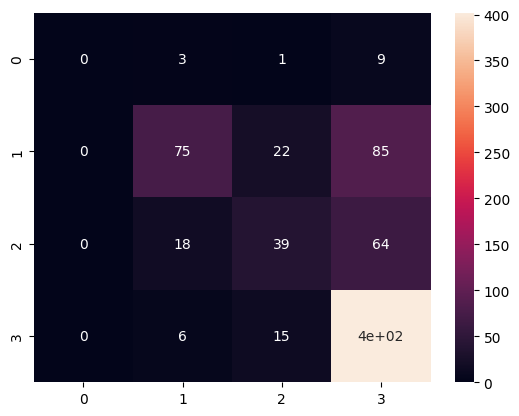

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,annot=True)

In [ ]:
#test

test = pd.read_csv(r"/content/Restaurants_Test_Data_PhaseB.csv")

In [ ]:
test_df = pd.DataFrame(test)
test_df.head(10)

,id,Sentence
0,32897564#894393#2,The bread is top notch as well.
1,33070600#670328#0,I have to say they have one of the fastest del...
2,33070600#670328#2,Food is always fresh and hot- ready to eat!
3,36244464#949326#5,Did I mention that the coffee is OUTSTANDING?
4,32894246#870052#0,"Certainly not the best sushi in New York, howe..."
5,32894246#870052#1,"I trust the people at Go Sushi, it never disap..."
6,32894246#870052#2,"Straight-forward, no surprises, very decent Ja..."
7,35390182#756337#4,"BEST spicy tuna roll, great asian salad."
8,35390182#756337#5,Try the rose roll (not on menu).
9,11447227#436718#3,"I love the drinks, esp lychee martini, and the..."


In [ ]:
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: x.lower().translate(translator))
test_df.iloc[:10]

,id,Sentence
0,32897564#894393#2,the bread is top notch as well
1,33070600#670328#0,i have to say they have one of the fastest del...
2,33070600#670328#2,food is always fresh and hot ready to eat
3,36244464#949326#5,did i mention that the coffee is outstanding
4,32894246#870052#0,certainly not the best sushi in new york howev...
5,32894246#870052#1,i trust the people at go sushi it never disapp...
6,32894246#870052#2,straightforward no surprises very decent japan...
7,35390182#756337#4,best spicy tuna roll great asian salad
8,35390182#756337#5,try the rose roll not on menu
9,11447227#436718#3,i love the drinks esp lychee martini and the f...


In [ ]:
test_df['tokens'] = test_df['Sentence'].apply(lambda x: tokenize(x))
df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)
test_df.head(10)

,id,Sentence,tokens
0,32897564#894393#2,the bread is top notch as well,"[bread, top, notch, well]"
1,33070600#670328#0,i have to say they have one of the fastest del...,"[say, one, fastest, delivery, times, city]"
2,33070600#670328#2,food is always fresh and hot ready to eat,"[food, always, fresh, hot, ready, eat]"
3,36244464#949326#5,did i mention that the coffee is outstanding,"[mention, coffee, outstanding]"
4,32894246#870052#0,certainly not the best sushi in new york howev...,"[certainly, best, sushi, new, york, however, a..."
5,32894246#870052#1,i trust the people at go sushi it never disapp...,"[trust, people, go, sushi, never, disappoints]"
6,32894246#870052#2,straightforward no surprises very decent japan...,"[straightforward, surprises, decent, japanese,..."
7,35390182#756337#4,best spicy tuna roll great asian salad,"[best, spicy, tuna, roll, great, asian, salad]"
8,35390182#756337#5,try the rose roll not on menu,"[try, rose, roll, menu]"
9,11447227#436718#3,i love the drinks esp lychee martini and the f...,"[love, drinks, esp, lychee, martini, food, als..."


In [ ]:
# Assuming 'tfidf' is the pre-fitted TfidfVectorizer

# Get the feature names from the vectorizer
feature_names = tfidf.get_feature_names_out()

# Apply the same preprocessing steps on the test data
test_df['tokens_str'] = test_df['tokens'].apply(lambda x: ' '.join(x))

# Transform the test data using the pre-fitted vectorizer and feature names
tfidf_vectors_test = tfidf.transform(test_df['tokens_str'])
tfidf_df_test = pd.DataFrame(tfidf_vectors_test.toarray(), columns=feature_names)

# Concatenate the original DataFrame with the TF-IDF DataFrame
test_df_tfidf = pd.concat([test_df.drop(['tokens', 'tokens_str'], axis=1), tfidf_df_test], axis=1)


In [ ]:
test_df_tfidf.head(10)

,id,Sentence,10,100,1015pm,10piece,11,12,1214,1215,...,yr,yuck,yum,yummy,yuzu,zabars,zen,zero,ziti,zucchini
0,32897564#894393#2,the bread is top notch as well,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33070600#670328#0,i have to say they have one of the fastest del...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33070600#670328#2,food is always fresh and hot ready to eat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36244464#949326#5,did i mention that the coffee is outstanding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32894246#870052#0,certainly not the best sushi in new york howev...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,32894246#870052#1,i trust the people at go sushi it never disapp...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,32894246#870052#2,straightforward no surprises very decent japan...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,35390182#756337#4,best spicy tuna roll great asian salad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,35390182#756337#5,try the rose roll not on menu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11447227#436718#3,i love the drinks esp lychee martini and the f...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_pred = model.predict(tfidf_df_test)

In [ ]:
test_pred

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'neutral', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negativ

In [ ]:
result_df = pd.DataFrame({'id': test_df['id'], 'target': test_pred})

In [ ]:
result_df.to_csv('predictions.csv', index=False)